<a href="https://colab.research.google.com/github/ReX0171/AI-Internship/blob/main/03_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 3: Heart Disease Prediction**
1. Objective
Build a machine learning model to predict whether a person is at risk of heart disease based on medical data.

In [13]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

sns.set(style='whitegrid')


In [14]:
#2.Loading Dataset
#I use the dataset i downloaded from kaggle.
df = pd.read_csv("HeartDiseaseTrain-Test.csv")
df.head()


,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0


In [15]:
## 3. Data Cleaning
## Check for missing values and basic structure of the data.

print(df.shape)
print(df.dtypes)
print(df.isnull().sum())

(1025, 14)
age                                int64
sex                               object
chest_pain_type                   object
resting_blood_pressure             int64
cholestoral                        int64
fasting_blood_sugar               object
rest_ecg                          object
Max_heart_rate                     int64
exercise_induced_angina           object
oldpeak                          float64
slope                             object
vessels_colored_by_flourosopy     object
thalassemia                       object
target                             int64
dtype: object
age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_

In [18]:
categorical_cols = ['sex', 'chest_pain_type', 'fasting_blood_sugar',
                    'rest_ecg', 'exercise_induced_angina', 'slope',
                    'vessels_colored_by_flourosopy', 'thalassemia']

# One-hot encode
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

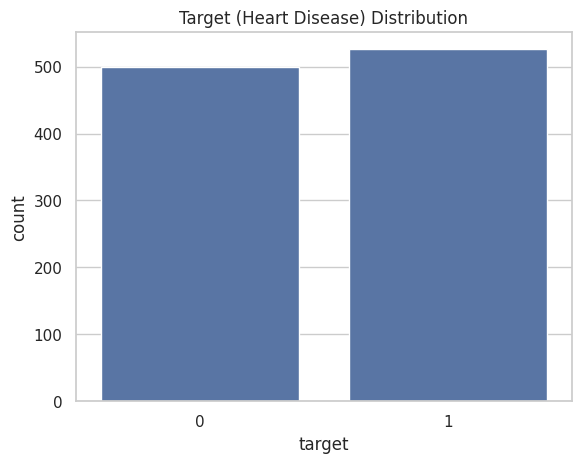

In [19]:
## 4. Exploratory Data Analysis (EDA)
# We explore the distribution of the target variable and relationships between features.
# Target distribution
sns.countplot(x='target', data=df)
plt.title('Target (Heart Disease) Distribution')
plt.show()


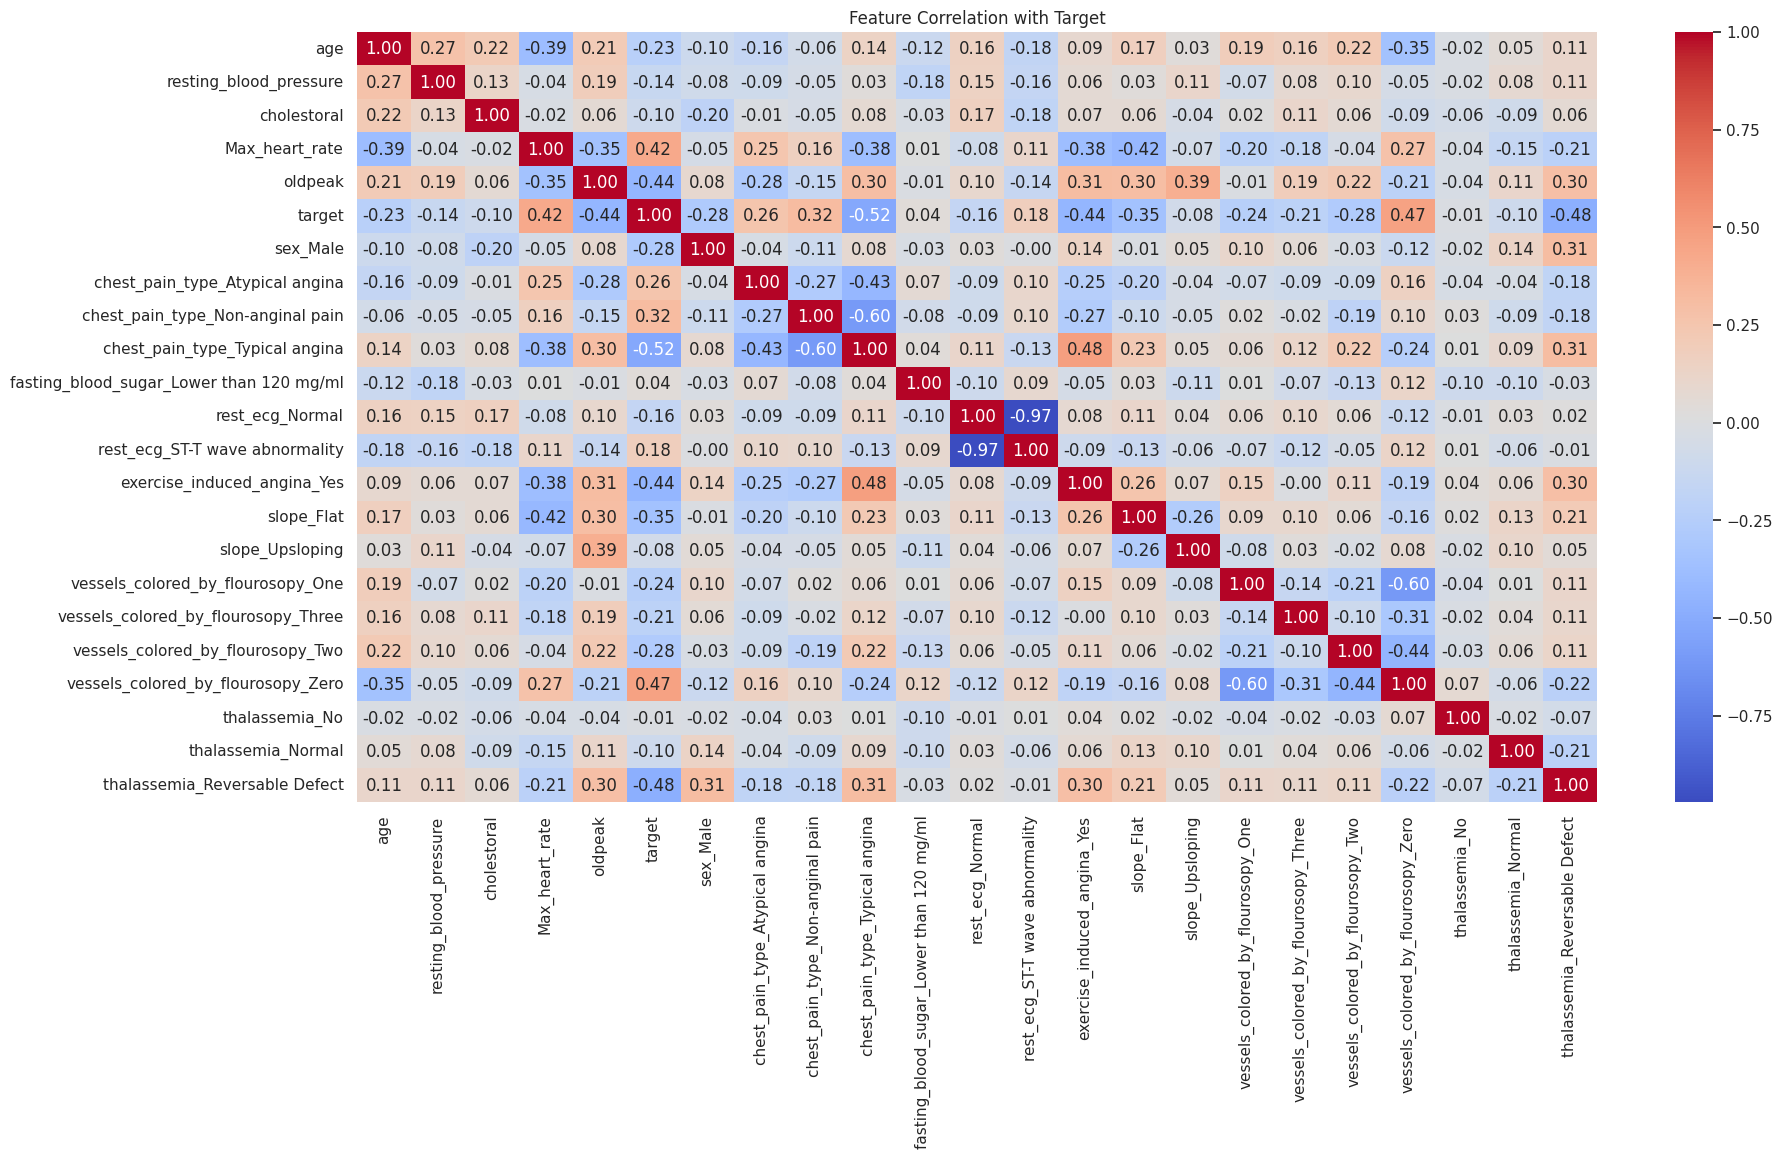

In [23]:
# Correlation
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Feature Correlation with Target")
plt.show()

In [24]:
# 6. Preparing Features and Labels
X = df.drop('target', axis=1)
y = df['target']

# Scaling features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**Training Models:**

In [25]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)

**Evaluation:**

In [26]:
print("🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_preds))
print("\nClassification Report:\n", classification_report(y_test, lr_preds))

🔹 Logistic Regression Results
Accuracy: 0.8097560975609757

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.75      0.80       102
           1       0.78      0.87      0.82       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



In [27]:
# 🔍 Overview:
# The Logistic Regression model achieved ~81% accuracy on the test set.
# It performs slightly better at identifying patients with heart disease (class 1) than without it.
# - Recall for class 1 is 0.87, meaning 87% of actual heart disease cases were correctly detected.
# - Precision for class 0 is 0.85, showing good performance in identifying non-disease cases.
# Overall, the model is balanced and gives reliable results for both classes.

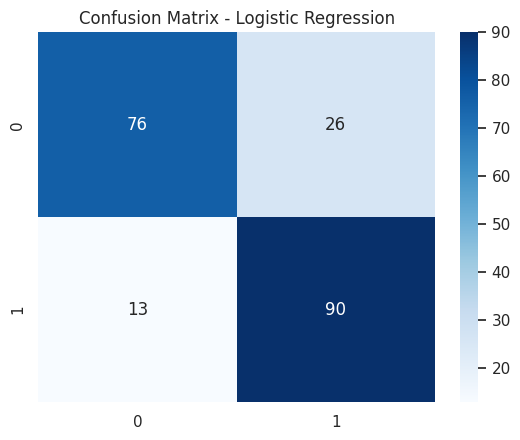

In [28]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [29]:
# ROC Curve
lr_probs = lr_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, lr_probs)
roc_auc = auc(fpr, tpr)

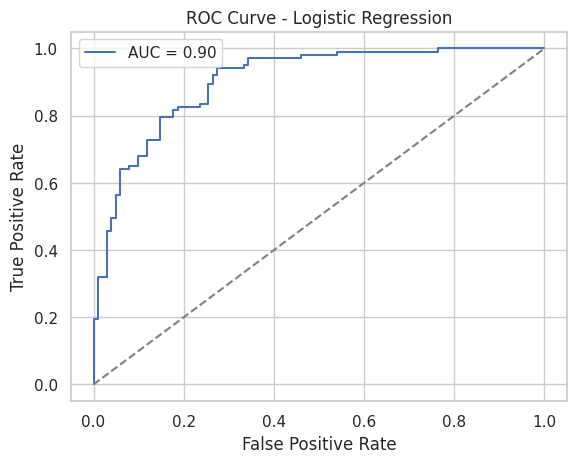

In [30]:
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

**9. Feature Importance - Decision Tree**

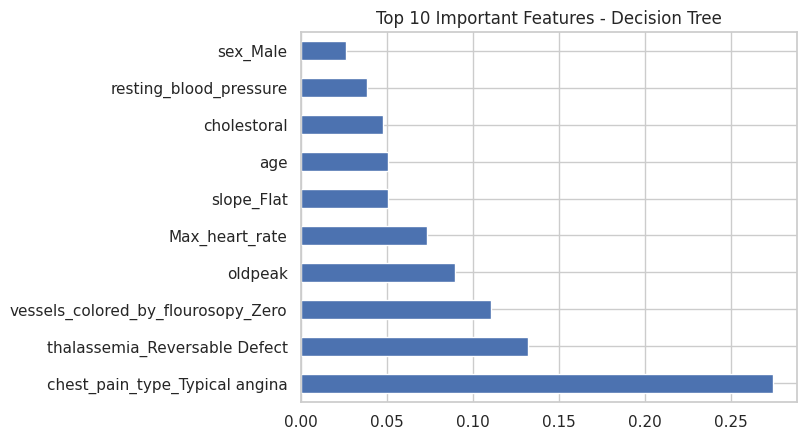

In [33]:
importances = pd.Series(dt_model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features - Decision Tree")
plt.show()
# Overview:
# This bar chart shows the top 10 features that the Decision Tree model used to make predictions.
# Features with higher importance contributed more to the model’s decisions.
# This helps us understand which medical factors (like chest pain type, age, or thalassemia) most strongly influence heart disease risk.
# You can use this insight to focus on key predictors or reduce less important features later.
